In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

Para el circuito con $Z_L = 25 + 45j$ se obtuvieron:
Solución 1:
\begin{align}
&C_p = 3.18\;pF&
&C_s = 7.95\;pF \\
\end{align}
Solución 2:
\begin{align}
&L_p = 7.95\;nH&
&C_s = 2.27\;pF \\
\end{align}

In [27]:
ZL = 25 + 45J
Zo = 50
Cp = 3.1830988618379067e-12
Cs1 = 7.957747154594766e-12
Lp = 7.957747154594767e-09
Cs2 = 2.2736420441699333e-12

\begin{align*}
    &\text{Opción 1:}&
    &\text{Opción 2:} \\
    & Z_{in} = \left ( \frac{-j}{3.18\text{pF}\cdot\omega} \;//\; \left ( Z_L+\frac{-j}{7.95\text{pF}\cdot\omega}\right )\right )&
    &Z_{in} = \left ( 7.95\text{nH}\cdot\omega j \;//\; \left ( Z_L +\frac{-j}{2.27\text{pF}\cdot\omega}\right )\right )\\
\end{align*}

In [28]:
Zin_1 = lambda f: ((-1J/(Cp*2*math.pi*f))**-1 + (ZL - (1J/(Cs1*2*math.pi*f)))**-1)**-1
Zin_2 = lambda f: ((1J*Lp*2*math.pi*f)**-1 + (ZL - (1J/(Cs2*2*math.pi*f)))**-1)**-1
r = lambda Zin: (Zin-Zo)/(Zin+Zo)
ROE = lambda r: (1+abs(r)) / (1-abs(r))
RL = lambda r: -20*np.log(abs(r))

In [29]:
x = np.linspace(900*1e6, 1.1*1e9, 1000000)

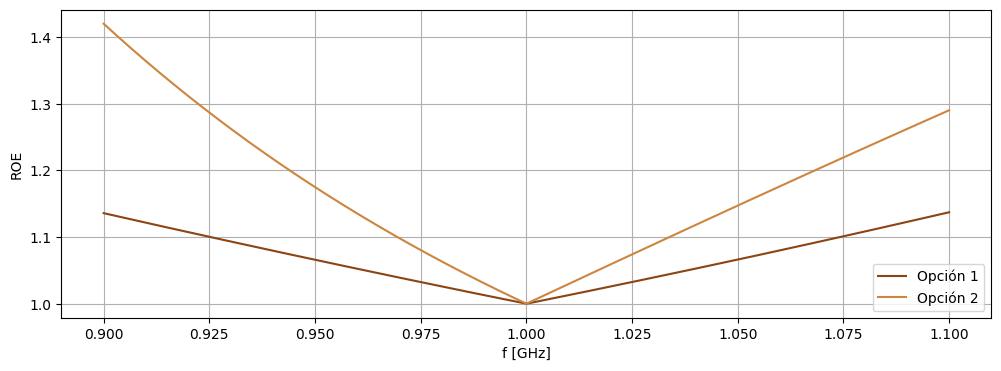

In [30]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, ROE(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, ROE(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("ROE")
plt.legend(loc="lower right")
plt.savefig("Ej1-Carga3_ROE")
plt.show()

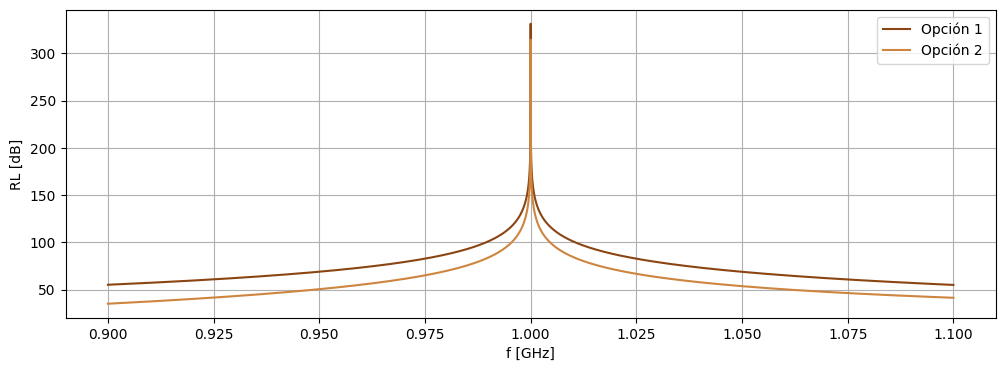

In [31]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, RL(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, RL(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("RL [dB]")
plt.legend(loc="upper right")
plt.savefig("Ej1-Carga3_RL")
plt.show()